In [17]:
%matplotlib notebook
import numpy as np
import sklearn
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from scipy.special import expit
from sklearn.svm import SVC

<IPython.core.display.Javascript object>


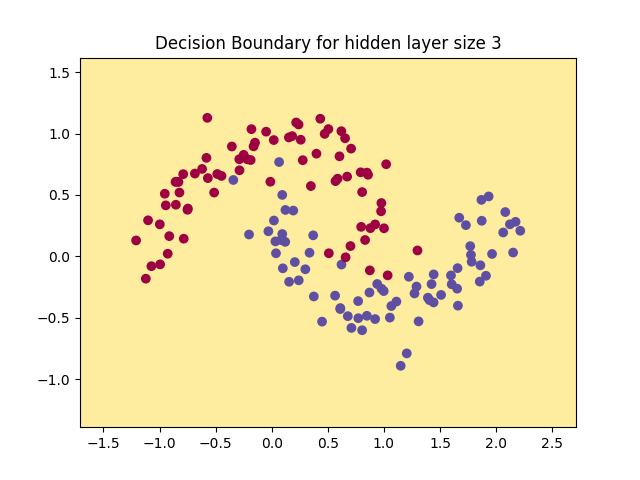

In [31]:
np.random.seed(0)
X, y = sklearn.datasets.make_moons(150, noise = 0.15)
plt.scatter(X[:, 0], X[:, 1], s = 40, c = y)

In [27]:
Y = np.reshape(y, (150, 1))
Y

array([[1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
    

In [4]:
observations = len(X)
input_neurons = 2
output_neurons = 1
hidden_neurons = 6
learning_rate = 0.0001
regularizer = 0.01
weights_1 = np.matrix([[np.random.randint(5) for i in range(input_neurons)] for j in range(hidden_neurons)])
weights_2 = np.matrix([[np.random.randint(5) for i in range(hidden_neurons)] for j in range(output_neurons)])
bias1 = np.random.randint(5)
bias2 = np.random.randint(5)

In [5]:
one_1 = np.ones((observations, 1))
zero_1 = np.zeros((hidden_neurons, 1))
zero_2 = np.zeros((output_neurons,1))
features = X
features

array([[ 0.99796961, -0.28235521],
       [-0.83146458,  0.60614501],
       [ 0.21731194,  1.09067477],
       [ 0.84762822, -0.48374482],
       [ 1.00054938,  0.22903077],
       [ 0.77145092, -0.503267  ],
       [-0.25016446,  0.82693913],
       [ 0.12008362,  0.11823931],
       [ 0.06555603,  0.76844483],
       [-1.0725682 , -0.07974669],
       [ 1.73013649,  0.25452754],
       [-0.28931419,  0.79109645],
       [-1.12222854, -0.18155979],
       [-0.58204833,  0.80243928],
       [-0.78426966,  0.14414662],
       [-0.16196671,  0.89598634],
       [-0.34260736,  0.62232153],
       [ 0.15469996, -0.20661874],
       [-0.14937428,  0.92631258],
       [ 0.58701235,  0.63298792],
       [ 1.44221023, -0.37485677],
       [-1.10217434,  0.29393659],
       [ 0.34859751,  0.57296602],
       [ 0.92115501,  0.26055958],
       [ 1.44300524, -0.14642376],
       [ 0.27625637,  0.78333211],
       [-0.35542116,  0.89518626],
       [ 0.5645095 , -0.3195255 ],
       [ 0.29931643,

In [6]:
weights_1 = np.float_(weights_1)
weights_1, weights_1.dtype

(matrix([[ 2.,  3.],
         [ 1.,  2.],
         [ 1.,  3.],
         [ 2.,  4.],
         [ 2.,  1.],
         [ 4.,  0.]]), dtype('float64'))

In [7]:
weights_2 = np.float_(weights_2)
weights_2, weights_2.dtype

(matrix([[ 2.,  2.,  4.,  2.,  4.,  0.]]), dtype('float64'))

In [8]:
def cost(weights_1, weights_2):

    z1 = np.dot(features, weights_1.T) + bias1
    a1 = expit(z1)
    z2 = np.dot(a1, weights_2.T) + bias2
    hypothesis = expit(z2)
    
    J = 0
    
    for i in range(observations) :
        J += (Y[i] * np.log(hypothesis[i])) + ((1 - Y[i]) * np.log(1 - hypothesis[i]))   
        
    return float( ((-1 * J ) + regularizer * ((np.linalg.norm(weights_1))**2 + (np.linalg.norm(weights_2))**2))/observations)

cost(weights_1, weights_2)

6.900073978022254

In [11]:
def train_model(weights_1, weights_2, bias1, bias2):
    
    model = {}
    iterations = 50000
    
    for i in range(iterations) :
        #Forward propagation
        z1 = np.dot(features, weights_1.T) + bias1     
        a1 = expit(z1)
        z2 = np.dot(a1, weights_2.T) + bias2
        hypothesis = expit(z2)     

        #Backpropagation
        delta3 = hypothesis - Y   
        gradient2 = np.dot(a1.T, delta3).T
        delta_bias2 = np.sum(delta3, axis = 0)/observations
        
        delta2 = np.multiply( np.dot(delta3, weights_2), np.multiply(a1, 1 - a1) )
        gradient1 = np.dot(features.T, delta2).T 
        delta_bias1 = np.sum(delta2, axis = 0)/observations
        
        #Gradient descent
        #Regularization doesn't hold for bias terms
        
        weights_2 = weights_2 - (gradient2 * learning_rate)
        weights_1 = weights_1 - (gradient1 * learning_rate)
        
        bias2 = bias2 - (regularizer * delta_bias2)
        bias1 = bias1 - (regularizer * delta_bias1)
        
        model = { 'W1' : weights_1 , 'W2' : weights_2, 'B1' : bias1, 'B2' : bias2 }
        
        if i % 100 == 0 :
            print(cost(weights_1, weights_2))
        
    return model
    
my_model = train_model(weights_1, weights_2, bias1, bias2)


6.882101205124906
5.10209535712572
3.3580090249983114
1.8014801942187604
1.2178179288052535
1.1384822884376045
1.1231533481630955
1.1158234699639251
1.1098637084937697
1.1043826506170045
1.0991963194964494
1.0942238790972478
1.0894111186816344
1.084718032116932
1.0801148031345453
1.0755793638552267
1.0710955868475882
1.0666519028110413
1.0622402424766193
1.057855229309047
1.0534935654665596
1.0491535655917859
1.044834802743428
1.0405378386546773
1.0362640168851012
1.032015302600034
1.027794156878727
1.0236034367792153
1.01944631499476
1.0153262149189846
1.0112467583745524
1.0072117242285399
1.0032250166927559
0.9992906423724457
0.9954126951719148
0.9915953480833795
0.987842850761863
0.9841595316927315
0.9805498037301216
0.9770181718325315
0.9735692419247518
0.9702077299325221
0.9669384701219798
0.9637664218933435
0.9606966741091162
0.9577344458844848
0.9548850825531116
0.9521540452794595
0.9495468925613341
0.9470692517005382
0.9447267782673572
0.9425251017018064
0.9404697555380863
0.93

0.79492720892594
0.7940536236731597
0.7931828716737545
0.7923149905696243
0.7914500176520872
0.7905879898633964
0.7897289437983385
0.7888729157058907
0.7880199414909212
0.7871700567159716
0.786323296603079
0.7854796960356508
0.784639289560399
0.783802111389328
0.7829681954017528
0.7821375751463897
0.7813102838434756
0.7804863543869358
0.7796658193465974
0.7788487109704438
0.7780350611869019
0.7772249016071754
0.7764182635276082
0.7756151779320969
0.7748156754945127
0.774019786581181
0.7732275412533758
0.7724389692698488
0.7716541000893855
0.7708729628733973
0.7700955864885204
0.7693219995092591
0.7685522302206401
0.7677863066208919
0.7670242564241473
0.7662661070631597
0.765511885692046
0.7647616191890442
0.7640153341592817
0.7632730569375671
0.7625348135911897
0.7618006299227383
0.761070531472928
0.7603445435234416
0.7596226910997795
0.7589049989741158
0.7581914916681827
0.7574821934561272
0.7567771283674111
0.756076320189698
0.7553797924717552
0.7546875685263505
0.7539996714331618
0.

In [32]:
my_model

{'B1': matrix([[ 1.65087034,  2.53343215,  2.5356827 ,  1.48626308,  1.53144865,
           2.7451254 ]]),
 'B2': matrix([[-1.6385677]]),
 'W1': matrix([[ 1.15825707,  3.07540469],
         [-1.80496046,  2.32867374],
         [ 4.50933556,  2.38063184],
         [ 0.74227543,  4.34618096],
         [-0.0701305 , -2.71015738],
         [ 4.36444371,  0.56763483]]),
 'W2': matrix([[-1.3420604 , -3.54281238,  2.80784595, -2.34695769,  5.37967639,
           1.84806301]])}